In [1]:
import torch
import torch.nn as nn
import numpy as np
import sys; sys.path.append('../src/')
import os
from model.cmpnts import MLP
from dataset.images import ImageToyDataset, generate_synthetic_dataset
import matplotlib.pyplot as plt
import torchvision as tv

In [2]:
data_dir = '../data/synthetic/'

In [3]:
img = tv.io.read_image('tri.png')
img = torch.cat([img, torch.zeros_like(img), torch.zeros_like(img)])

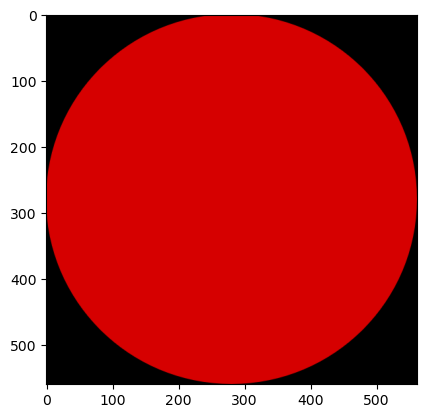

In [4]:
plt.imshow(img.permute(1,2,0))

In [5]:
import torchvision.transforms as tt
tf = nn.Sequential(
            tt.RandomAffine(degrees=0, translate=(0.2, 0.2), scale=(0.2, 0.5)), # 3
            tt.ColorJitter(hue=(0, 0.5), brightness=(0.3, 1)), # 2
            tt.Resize(32)
        )

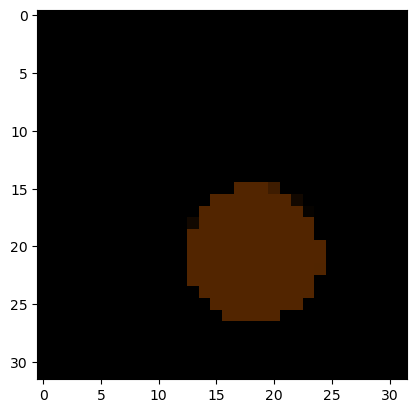

In [40]:
plt.imshow(tf(img).permute(1,2,0))

In [7]:
dataset = generate_synthetic_dataset('tri.png', 30000)

100%|██████████| 30000/30000 [13:37<00:00, 36.67it/s]


In [10]:
dataset.max() / 255

tensor(0.8353)

In [11]:
np.save(data_dir + 'images_30k', dataset.detach().numpy() / 255)